<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/Aula_FinQuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criação de Relatórios com o Python**

A intenção desta aula é ensinar sobre bibliotecas que trabalham no estilo de 'report', isto é, criam análises e visualizações prontas de métricas, indicadores e modelos de cunho quantitativo no mercado financeiro.

Com este intuito, vamos trabalhar algumas bibliotecas, nomeadamente:

* FinQuant
* QuantStats
* RiskFolio

E por último, vamos colocar isso num PDF com a biblioteca FPDF.

## 1. FinQuant

In [ ]:
!pip install finquant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
from finquant.portfolio import build_portfolio

In [ ]:
names = ['^BVSP', 'VALE3.SA', 'PETR4.SA', 'WEGE3.SA',
         'ABEV3.SA', 'HGLG11.SA']

start_date = '2018-01-01'
end_date = '2021-12-31'

In [ ]:
pf = build_portfolio(names = names, 
                     start_date = start_date, 
                     end_date = end_date,
                     data_api = 'yfinance')

[*********************100%***********************]  6 of 6 completed


In [ ]:
pf.data.head()

,^BVSP,VALE3.SA,PETR4.SA,WEGE3.SA,ABEV3.SA,HGLG11.SA
Date,,,,,,
2018-01-02,77891.0,29.080244,7.292882,8.969449,18.143393,118.044456
2018-01-03,77995.0,28.905991,7.358980,8.833220,18.185215,118.314957
2018-01-04,78647.0,29.024481,7.372200,8.747186,18.084841,118.405121
2018-01-05,79071.0,29.477558,7.416266,8.783033,18.151760,118.406052
2018-01-08,79379.0,30.132767,7.504396,8.854730,18.118301,118.406052


In [ ]:
pf.properties()

----------------------------------------------------------------------
Stocks: ^BVSP, VALE3.SA, PETR4.SA, WEGE3.SA, ABEV3.SA, HGLG11.SA
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.213
Portfolio Volatility: 0.257
Portfolio Sharpe Ratio: 0.809

Skewness:
      ^BVSP  VALE3.SA  PETR4.SA  WEGE3.SA  ABEV3.SA  HGLG11.SA
0 -0.015467  1.122615 -0.193059  0.408112 -0.050574  -0.209225

Kurtosis:
     ^BVSP  VALE3.SA  PETR4.SA  WEGE3.SA  ABEV3.SA  HGLG11.SA
0 -0.92276 -0.178228 -0.485654 -1.526845  0.012513  -0.654887

Information:
   Allocation       Name
0    0.166667      ^BVSP
1    0.166667   VALE3.SA
2    0.166667   PETR4.SA
3    0.166667   WEGE3.SA
4    0.166667   ABEV3.SA
5    0.166667  HGLG11.SA
----------------------------------------------------------------------


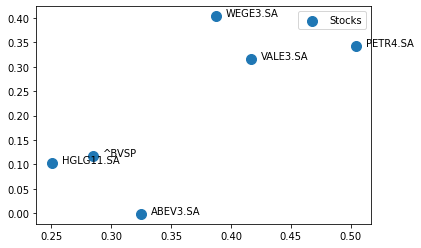

In [ ]:
pf.plot_stocks()

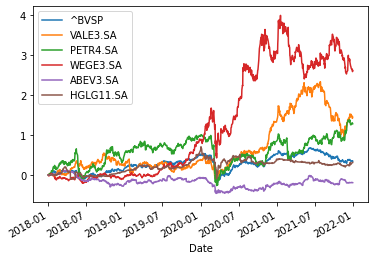

In [ ]:
pf.comp_cumulative_returns().plot()

In [ ]:
from finquant.moving_average import compute_ma, ema, sma

In [ ]:
petro = pf.get_stock('PETR4.SA').data

In [ ]:
spans = [10, 50, 100]

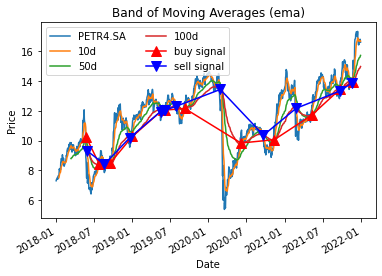

In [ ]:
ma = compute_ma(petro, ema, spans, plot = True)

In [ ]:
ma.head()

,PETR4.SA,10d,50d,100d
Date,,,,
2018-01-02,7.292882,NaN,NaN,NaN
2018-01-03,7.358980,NaN,NaN,NaN
2018-01-04,7.372200,NaN,NaN,NaN
2018-01-05,7.416266,NaN,NaN,NaN
2018-01-08,7.504396,NaN,NaN,NaN


In [ ]:
from finquant.moving_average import plot_bollinger_band

Bandas de Bollinger para PETR4

In [ ]:
span = 20

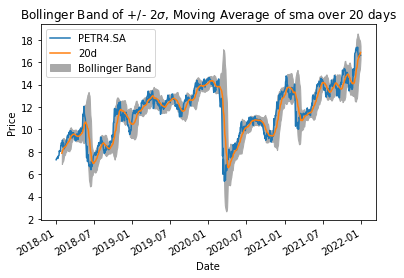

In [ ]:
plot_bollinger_band(petro, sma, span)

Fronteira Eficiente

10 mil iterações do método de Monte Carlo

In [ ]:
opt_w, opt_res = pf.mc_optimisation(num_trials = 10000)

/usr/local/lib/python3.8/dist-packages/finquant/monte_carlo.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


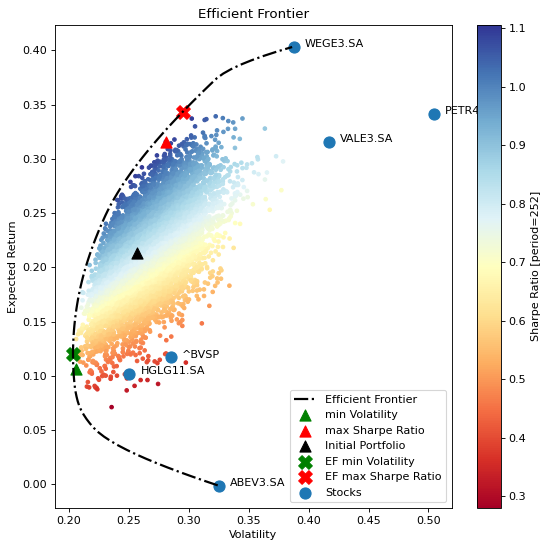

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize = (8,8), dpi = 80)

pf.mc_plot_results()

pf.ef_plot_efrontier()

pf.ef_plot_optimal_portfolios()

pf.plot_stocks()

plt.savefig('efficientfrontier.png')

Composição da carteira otimizada

In [ ]:
opt_w

,^BVSP,VALE3.SA,PETR4.SA,WEGE3.SA,ABEV3.SA,HGLG11.SA
Min Volatility,0.295533,0.042937,0.00217,0.014361,0.138555,0.506443
Max Sharpe Ratio,0.009877,0.164621,0.14285,0.486806,0.024186,0.171660


In [ ]:
opt_res

,Expected Return,Volatility,Sharpe Ratio
Min Volatility,0.106100,0.205990,0.490802
Max Sharpe Ratio,0.315816,0.280921,1.106420


Para avançar:

1. Exportar como png todos os gráficos criados acima
2. Plugar no script que gera o pdf